# Polynominterpolation

### Interpolationsproblem

Bestimme zu gegebenen Daten $(xk, yk)$ , $k = 0,1,...,n$ einer stetigen Funktion $f$ , $yk = f(xk)$
mit paarweise verschiedenen Stutzwerten (Knoten) $x_k$ ein Polynom $p \in  \Pi_n([a,b])$, welches
die $n+1$ Interpolationsbedingungen
$$
p(x_k) = f(x_k) = y_k, \quad k = 0,1,...n 
$$
erfüllt.

### Newton-Basis

Gegeben seien n+1 paarweise verschiedene Stützstellen $x0,..., xn$. Dann bezeichnet man
die $n+1$ Polynome
$$
ω_0(x) = 1
ω_i(x) = \prod_{j=0}^{i-1}(x−x_j), \quad i = 1,...n
$$
als die Newtonbasis von $\Pi_n$ bezuglich der Stützstellen $x0,..., xn$. Die Darstellung des Interpolationspolynom in dieser Basis:
$$
P(f|x_0, x_0, x_1, x_1)(x)= \sum_{i=0}^n b_iw_i(x)
$$
heißt Newtondarstellung.

### Effiziente Auswertung in der Hornerdarstellung
$P(f|x_0, x_0, x_1, x_1)(x)= b_0 + (x−x_0)(b_1+(x-x_1)(b_2+(x-x_2(...+(x-x_{n-1} )b_n...)$

###  dividierte Differenzen
$b_i =: f [x_0, x_1,..., x_i]$, d.h.
$$
P(f|x_0, x_0, x_1, x_1)(x)=f[x_0] + f[x_0,x_1](x - x_0) + ... + f[x_0,x_1,...,x_n](x - x_0) ... (x - x_{n-1})
$$

### Rekursionsformel für dividierte Differenzen
$$
f[x_r,...,x_s] = \frac{f[x_{r+1},...,x_s]-f[x_r,...,x_{s-1}]}{x_s-x_r}
$$

# Spline-Interpolation

### Stückweise lineare Interpolation 
Bestimme zu gegebenen Daten $(x_j, y_j)$, $j = 0,1,...,n$ eine stetige Funktion $s$, die auf jedem Teilintervall $I_j = [x_j, x_j+1]$ ein Polynom vom $Grad \leq  1$ ist und die Interpolationsbedingungen
$$
s(x_j) = y_j,\quad j = 0,1,...n
$$
erfüllt.

### Vektorraum der linearen Splines
$$
S_1^n = {s \in C([a,b])|s_j:= s_{[x_j,x_j+1]}\in  \Pi_1}
$$



### Kubische Splineinterpolation
Der Funktionenraum
$$
S_3^n = {s \in C^2([a,b])|s_j:= s_{[x_j,x_j+1]}\in  \Pi_1}
$$
heißt der Raum der kubischen Splines zu den Knoten.

### Spline-Interpolationsproblem

Bestimme zu vorgegebenen Stützpunkten  $a = x_0 < ··· < x_n = b$ und Stützwerten $y_0,..., y_n$ einen Spline $s \in S_3^n$ mit
$$
s(x_j) = y_j,\quad j = 0,...n
$$
$$
s^{\prime\prime}(a) = s^{\prime\prime}(b) = 0 
$$

- Betrachte nur den vereinfachten Fall mit äquidistanten Stützstellen im Abstand
$$
h := x_{j+1} − x_j ,\quad j = 0, . . . , n − 1
$$

- Die zweite Ableitung von s ist stetig:
$$
mj:= s^{\prime\prime}(x_j) = s_j^{\prime\prime}(x_j) = s_{j-1}^{\prime\prime}(x_j)
$$
$s_j \in \Pi_3$, daher $s_j^{\prime\prime}x$ in $\Pi_1$ und
$$
s_j^{\prime\prime}x=m_j \frac{(x_{j+1} - x}{h} + m_{j+1}\frac{(x - x_j}{h}
$$


- Rechnung ergibt 
\begin{align*}
s_j(x) = \frac{1}{6h} \big( m_j(x_{j+1} - x)^3 + m_{j+1}(x - x_j)^3 \big) 
 +  \frac{1}{h} \big( y_j(x_{j+1} - x) + y_{j+1}(x - x_j)\big) 
  - \frac{h}{6} \big( m_j(x_{j+1} - x) + m_{j+1}(x - x_j)\big)
\end{align*}


- Noch zu fordern: Stetigkeit der 1. Ableitung
$$
s_{j-1}^{\prime}x_j = s_j^{\prime}x_j, \quad j = 1,...,n−1,
$$
- Einsetzen
$$
m_{j−1} +4m_j +m_j+1 = \frac{6}{h^2}(y_{j-1}-2y_j+y_{j+1}) , \quad  j = 1,...,n−1.
$$



- Mit den geforderten natürlichen Randbedingungen $m_0 = m_n = 0$  ergibt sich schließlich das folgende quadratische LGS für die $n − 1$ Unbekannten $(m_1,...,m_{n−1})$:

$$
 \begin{pmatrix} 
        4& 1 & & \\ 
        1& 4& \ddots & \\
         &\ddots & \ddots & 1\\
          & & 1 & 4
        \end{pmatrix}
 \begin{pmatrix} 
       m_1 \\
       m_2 \\
       \vdots \\
       m_{n-1}
      \end{pmatrix}
= \frac{6}{h^2}
\begin{pmatrix} 
       y_0-2y_1+y_2 \\
       y_1-2y_2+y_3\\
       \vdots \\
       y_{n-2}-2y_{n-1}+y_n
      \end{pmatrix}
$$      
                          





### Aufgabe 
Vergleichung die Approximationseigenschaften der kubischen Spline-Interpolation und der Polynominterpolation für die Rungefunktion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interpol1d import splineinterpol , poly_interpol

Text(0, 0.5, 'y')

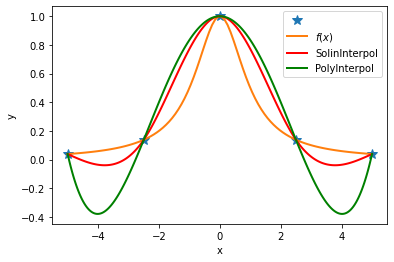

In [2]:
def f(x):
    return 1 /(1 + x*x)

n = 100
f_x = np.linspace(-5, 5, n)
f_y = f(f_x)

number_of_support_points = 5
xi = np.linspace(-5, 5, number_of_support_points)
yi = f(xi)

x = []
for i in range(1, number_of_support_points):
    x.append(np.linspace(xi[i-1], xi[i], n))

spline_interpols = []
poly_interpols = []
for i in range(len(x)):
    spline_interpols.append(splineinterpol(x[i], xi ,yi))
    poly_interpols.append(poly_interpol(x[i], xi, yi))
    
plt.plot(xi, yi, '*', markersize=10)
plt.plot(f_x, f_y, linewidth = 2)
for i in range(len(x)):
    plt.plot(x[i], spline_interpols[i], linewidth=2, color='red')
    plt.plot(x[i], poly_interpols[i], linewidth=2, color='green')
plt.legend(['', r'$f(x)$', 'SolinInterpol', 'PolyInterpol'])
plt.xlabel('x')
plt.ylabel('y')